### Regression

Regression analysis is a statistical method to model the relationship between a dependent (target) and independent (predictor) variables with one or more independent variables. More specifically, Regression analysis helps us to understand how the value of the dependent variable is changing corresponding to an independent variable when other independent variables are held fixed. It predicts continuous/real values such as temperature, age, salary, price, etc.

eg.House Price prediction
   Stock Price Prediction 
   Advertisement and Sales
   Temp prediction.


Regression is a supervised learning technique which helps in finding the correlation between variables and enables us to predict the continuous output variable based on the one or more predictor variables. It is mainly used for prediction, forecasting, time series modeling, and determining the causal-effect relationship between variables.

In Regression, we plot a graph between the variables which best fits the given datapoints, using this plot, the machine learning model can make predictions about the data. In simple words, "Regression shows a line or curve that passes through all the datapoints on target-predictor graph in such a way that the vertical distance between the datapoints and the regression line is minimum." The distance between datapoints and line tells whether a model has captured a strong relationship or not.

Some examples of regression can be as:
Prediction of rain using temperature and other factors
Determining Market trends
Prediction of road accidents due to rash driving.

## Terminologies Related to the Regression Analysis:
Dependent Variable: The main factor in Regression analysis which we want to predict or understand is called the dependent variable. It is also called target variable


Independent Variable: The factors which affect the dependent variables or which are used to predict the values of the dependent variables are called independent variable, also called as a preictor.


Outliers: Outlier is an observation which contains either very low value or very high value in comparison to other observed values. An outlier may hamper the result, so it should be aoidede


Multicollinearity: If the independent variables are highly correlated with each other than other variables, then such condition is called Multicollinearity. It should not be present in the dataset, because it creates problem while ranking the most affecting vble.aria


Underfitting and Overfitting: If our algorithm works well with the training dataset but not well with test dataset, then such problem is called Overfitting. And if our algorithm does not perform well even with training dataset, then such problem is called underfitting

## Types of Regression :
1.Single Linear Reg
2.Multiple Linear Reg
3.Polynomial Linear Reg


[1 2 3 4] [4.5 5.  5.5 6. ]


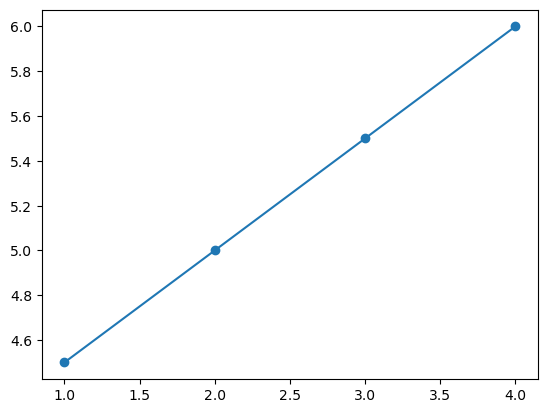

In [4]:
import numpy as np
import matplotlib.pyplot as plt
x=np.array([1,2,3,4])
slope=0.5
inter=4   # intercept
y=slope*x+inter
print(x,y)
plt.plot(x,y)
plt.scatter(x,y)
plt.show()

In [5]:
# slope and intercept are called coefficients in ML
# y=mx+c  m: slope ,c : y intercept
area=np.array([700,750,800,900,1000])
price=np.array([20,30,33,45,70])

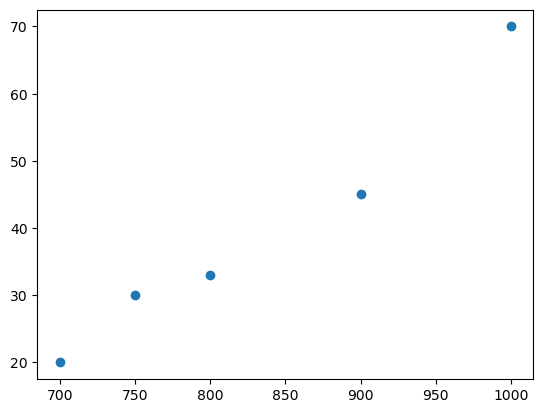

In [7]:
plt.scatter(area,price)

In [10]:
slope=1
int=2
price_pred=slope*area+int

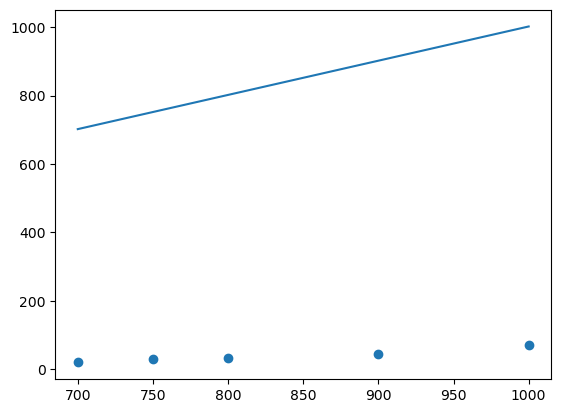

In [11]:
plt.scatter(area,price)
plt.plot(area,price_pred)

In [ ]:
# as we have taken arbitrary slope and intercept values the predicted and actual
# price are very farer away from each other ,and this will give a big error
# so we have to find such a values of slope and c which will be passing
# through most of the points or nearer to most of the points 
# such a line is called as best fit line.

In [ ]:
# OLS : ordinary Least Square method :
# TO find the best fit line
# for simple lR : the equation is w0+w1x
# for multiple LR : the equation is w0+w1x1+w2x2+....+wnxn

# if y is actual value and y^ is pred value then y-y^ is error called as residue
# it can be positive or -ve so to find whole error we square this y-y^.

# total error =(y1-y1^)2+.......(yn-yn^)2
# MSE==mean Squared Error=total error/n
# and we have to find out the values of coefficients or weights that will give 
# minimum value of MSE 
#so this MSE is called loss or cost function.
# loss fun or cost function is the function to be optimised so that we will get mini
#mum error.

In [12]:
print(area,price)

[ 700  750  800  900 1000] [20 30 33 45 70]


In [13]:
mean_area=np.mean(area)  # xbar
mean_price=np.mean(price)  # ybar
print(mean_area,mean_price)


830.0 39.6


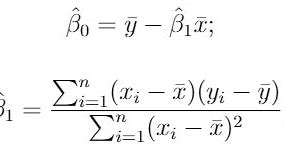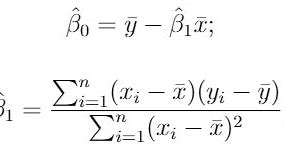

In [15]:
w1=np.sum((area-mean_area)*(price-mean_price))/np.sum((area-mean_area)**2)

In [16]:
w0=mean_price-w1*mean_area

In [17]:
print(w1,w0)

0.15620689655172415 -90.05172413793105


In [19]:
pred_price=w1*area+w0

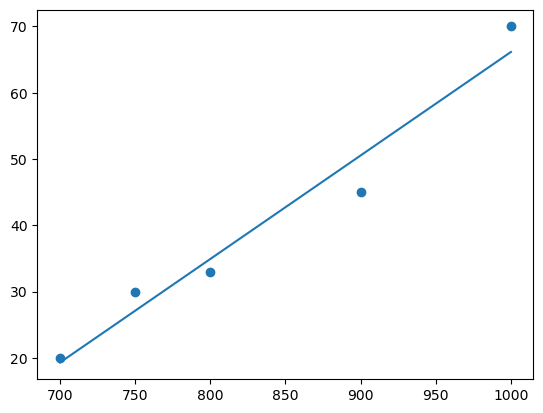

In [20]:
plt.scatter(area,price)
plt.plot(area,pred_price)

In [21]:
# for area= 1200
price_12=w1*(1200)+w0
print(price_12)

97.39655172413794


In [ ]:
### Simple Linear Regression :
## only one dep and only one ind var


In [31]:
# importing the libraries :
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from scipy import stats

In [32]:
# importing the dTset
df=pd.read_csv('placement.csv')

In [33]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [34]:
# null values
df.isnull().sum()

cgpa       0
package    0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


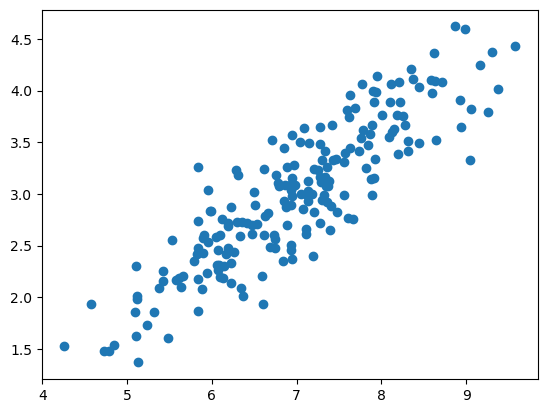

In [36]:
# to check relationaship bet dep and int var
# dep  ---> package
# inde ----> cgpa
plt.scatter(df['cgpa'],df['package'])

In [37]:
#Dividing the dataset into dep and ind var
x=df['cgpa']                # inde var  cgpa
# x=df.iloc[:,0]

In [38]:
x.head()

0    6.89
1    5.12
2    7.82
3    7.42
4    6.94
Name: cgpa, dtype: float64

In [39]:
y=df['package']   # dep var
y.head()

0    3.26
1    1.98
2    3.25
3    3.67
4    3.57
Name: package, dtype: float64

<Axes: ylabel='cgpa'>

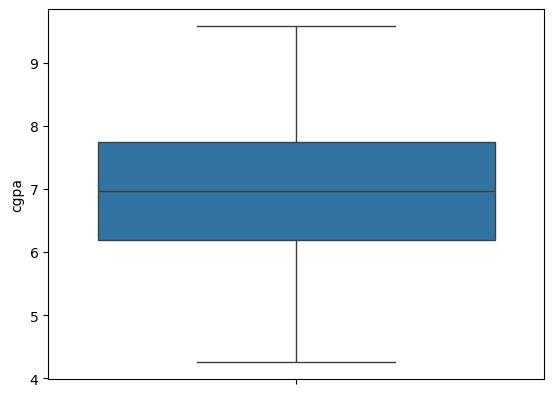

In [40]:
sns.boxplot(x)

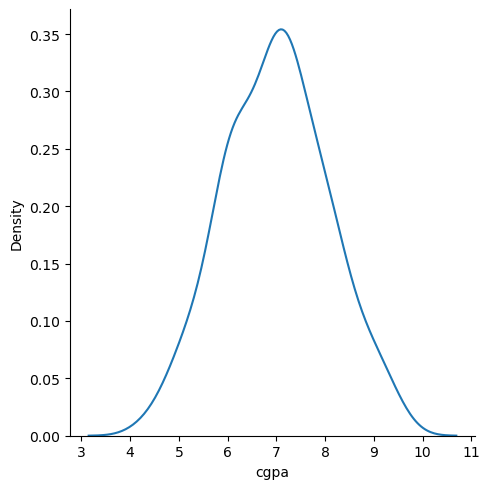

In [41]:
sns.displot(x,kind='kde')

In [42]:
# model Building 
# Now we have to split our data into training 
# data and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
# 0.2 test size =20 percentage data for testing
x_train.shape

(160,)

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
# 0.2 test size =20 percentage data for testing
x_train.shape

(160,)

In [44]:
# model Building 
# Now we have to split our data into training 
# data and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
# 0.2 test size =20 percentage data for testing
x_train.shape

(160,)

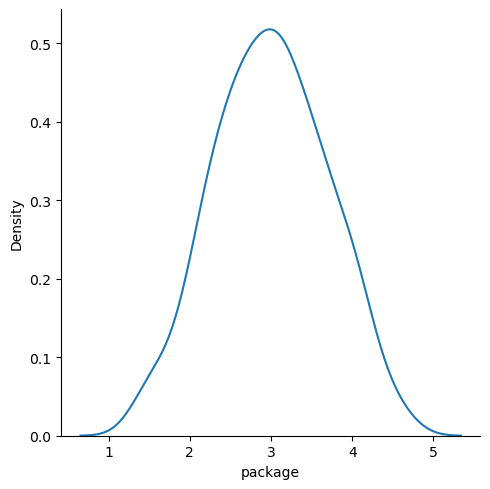

In [45]:
sns.displot(y,kind='kde')

In [46]:
x_train.shape
x_train=x_train.values.reshape(-1,1)

In [47]:
x_test.shape
x_train.shape

(160, 1)

In [48]:
### Using Linear Regression :
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [49]:
y_pred=lr.predict(x_test.values.reshape(-1,1))

In [24]:
y_pred

array([2.97012606, 2.55516816, 2.61856451, 3.40237388, 3.05657563,
       2.35921582, 3.51763996, 2.4687186 , 4.1227869 , 3.21794814,
       2.12868365, 3.19489493, 2.53787825, 3.05081232, 3.36779405,
       2.86062328, 2.63009112, 2.82028015, 2.37074243, 2.91825632,
       3.1660784 , 2.3361626 , 3.50611335, 3.9902309 , 2.20360661,
       1.90967809, 3.08539215, 2.6070379 , 1.9212047 , 1.90391479,
       2.91249302, 3.69630239, 2.60127459, 2.09410383, 2.50906173,
       3.64443265, 3.17184171, 2.97012606, 3.83462169, 2.50329842])

In [ ]:
# R square  : Measure of Accuracy of the linear regression model
# coefficient of Determination.
# R square  high ===> our model is accurate more

In [50]:
from sklearn.metrics import r2_score

In [51]:
r2_score(y_test,y_pred)
# 73% accurate

0.7297167943957027

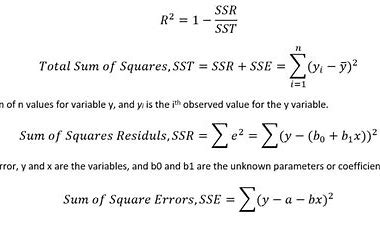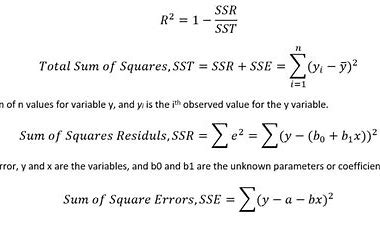

In [52]:
# To find the coefficents of Bast fit line : w0 ,w1  y=w0+w1x
w1=lr.coef_
w0=lr.intercept_

In [53]:
print(w1,w0)

[0.57633042] -1.0296070415163103


In [54]:
# what is package for cgpa=9.7
x=9.7

In [55]:
pred_package=w1*x+w0

In [56]:
pred_package

array([4.56079802])

In [ ]:
### x_train y_train===> scatter plot
##  x_test ,y_pred===>line plot

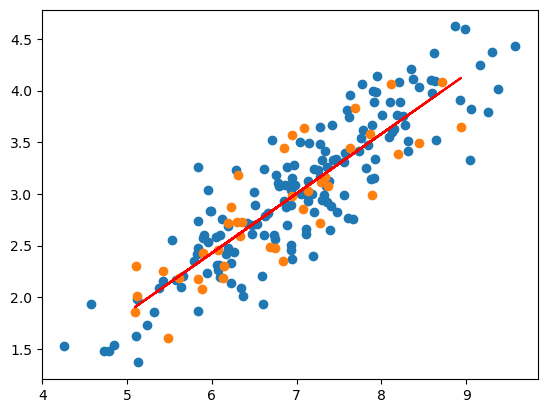

In [58]:
plt.figure()
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color='red')
plt.show()